# PROYECTO FINAL: Primera Entrega

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## DATASET: COVID-19 (Coronavirus)

El set de datos incluye información de casos, muertes, testeos y vacunaciones por COVID-19. Se analizó la relación que existe entre el País, fecha, total de casos, fallecidos, cantidad de personas vacunadas, vacunaciones diarias, personas con esquema completo.


LICENCIA:

Descargado de [Our World In Data](https://ourworldindata.org/)

Estos datos han sido recopilados, agregados y documentados por Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina y Max Roser.
____________________________________________________________________________

## 1.- Objetivo
La pandemia de coronavirus es la mayor crisis de salud pública que el mundo ha enfrentado en más de un siglo y ha demostrado que todos nosotros, como una comunidad interconectada, solo podemos estar seguros si todas las personas están incluidas y protegidas. ¿Existe la posibilidad de predecir si las personas cumplen con el programa de vacunación?

## 2.- Contexto Comercial
La enfermedad por coronavirus es una enfermedad infecciosa provocada por el virus SARS-CoV-2 que afectó a millones de personas a nivel mundial. Gracias al programa de vacunación los casos de muertes e internaciones han disminuido notablemente. Es de mucho interés para el ámbito médico y de salud pública o privada, poder predecir la continuidad en el programa de vacunación.

## 3.- Problema Comercial
Con los datos recolectados se busca construir visualizaciones que ayuden a identificar patrones en el proceso de vacunación por COVID a nivel mundial, cruzar distintas variables para determinar el grado de precisión de las tendencias que puedan surgir y dar respuestas a las siguientes preguntas:
* ¿Qué país a realizado más vacunaciones?
* ¿En que año se realizaron más vacunaciones?
* ¿Qué vacuna utiliza cada país?
* ¿En qué país el programa de vacunación está más avanzado?
* ¿Dónde se vacunan más personas por día?

## 4.- Contexto analítico
Se ha proporcionado un archivo CSV que contiene detalles acerca de las vacunaciones por COVID, por ejemplo, país, fecha, total de vacunaciones, total de personas vacunadas, total de personas vacunadas por día y vacunas utilizadas.
Se realizan las siguentes tareas con los datos:
* Leer, transformar y preparar datos para su visualización.
* Realizar análisis y construir visualizaciones de los datos para identificar patrones.


In [2]:
# Carga de datos
data = pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Cantidad de datos en el dataset
data.shape

(255132, 67)

In [4]:
# Nombre de columnas
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255132 entries, 0 to 255131
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    255132 non-null  object 
 1   continent                                   240808 non-null  object 
 2   location                                    255132 non-null  object 
 3   date                                        255132 non-null  object 
 4   total_cases                                 240714 non-null  float64
 5   new_cases                                   240396 non-null  float64
 6   new_cases_smoothed                          239192 non-null  float64
 7   total_deaths                                221101 non-null  float64
 8   new_deaths                                  221007 non-null  float64
 9   new_deaths_smoothed                         219821 non-null  float64
 

In [6]:
# Descripción de los datos
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.407140e+05,2.403960e+05,2.391920e+05,2.211010e+05,221007.000000,219821.000000,239620.000000,239302.000000,238103.000000,220020.000000,...,153335.000000,101120.000000,182772.000000,234063.000000,200367.000000,2.540380e+05,8.382000e+03,8382.000000,8421.000000,8382.000000
mean,5.194802e+06,1.191074e+04,1.195734e+04,7.920396e+04,128.667929,129.165797,72071.691877,179.743983,180.369890,745.760968,...,32.819657,50.905433,3.089431,73.598422,0.724564,1.405755e+08,5.056854e+04,10.160042,14.073069,1465.397890
std,3.201371e+07,8.259937e+04,8.030147e+04,4.039224e+05,742.354146,688.090221,122344.825067,1133.232962,671.261017,1023.124288,...,13.538734,31.885973,2.551717,7.446775,0.149555,6.917944e+08,1.397978e+05,13.270403,25.842914,1828.316453
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281517
25%,5.569000e+03,0.000000e+00,4.714000e+00,1.230000e+02,0.000000,0.000000,1352.023000,0.000000,0.977000,33.479000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.367830e+05,6.697500e+01,0.910000,0.170000,45.065925
50%,6.097400e+04,3.900000e+01,7.985700e+01,1.341000e+03,0.000000,1.143000,13551.999500,5.086000,16.525000,246.288000,...,33.100000,49.839000,2.500000,75.050000,0.742000,6.948395e+06,6.609100e+03,7.830000,7.480000,898.884707
75%,6.311110e+05,8.400000e+02,1.023000e+03,1.089300e+04,12.000000,13.714000,85580.496000,85.911000,125.485500,1115.825000,...,41.300000,83.241000,4.200000,79.070000,0.838000,3.369661e+07,3.650865e+04,15.910000,19.070000,2326.471482
max,6.715160e+08,4.082891e+06,3.436560e+06,6.843895e+06,60786.000000,14860.286000,718922.955000,228872.025000,36421.827000,6436.700000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.253112e+06,76.550000,376.770000,10112.674000


In [7]:
data.describe(include=object)

,iso_code,continent,location,date,tests_units
count,255132,240808,255132,255132,106788
unique,248,6,248,1131,4
top,ARG,Europe,Argentina,2021-09-11,tests performed
freq,1131,58383,1131,247,80099


De las tablas anteriores podemos concluir que:
1. Se analizaron 248 paises y hay un total de 1.131 días analizados
2. El total de casos de COVID-19 va entre 1 (posibles outliers) y 671.516.000, siendo la media de 60.974
3. El total de muertes va entre 1 (posibles outliers) y 6.843.895, siendo la media de 1.341
4. El total de vacunaciones va entre 0 (posibles valores nulos) y 13.264.310.000, siendo la media de 10.262.080
5. Las personas vacunadas entre 0 (posibles valores nulos) y 5.536.395.000, siendo la media de 4.982.099
6. Total de refuerzos entre 1 (posibles outliers) y 2.723.237.000, siendo la media de 3.198.415

In [8]:
data.isnull().sum()

iso_code                                        0
continent                                   14324
location                                        0
date                                            0
total_cases                                 14418
                                            ...  
population                                   1094
excess_mortality_cumulative_absolute       246750
excess_mortality_cumulative                246750
excess_mortality                           246711
excess_mortality_cumulative_per_million    246750
Length: 67, dtype: int64

Acá podemos ver que hay muchos valores vacios, y hay que tratarlos antes de analizar la información.

## 5.- EDA - Exploración de datos

In [9]:
# Convertir DATE a formato fecha
data['date'] = pd.to_datetime(data['date'])
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 255132 entries, 0 to 255131
Series name: date
Non-Null Count   Dtype         
--------------   -----         
255132 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.9 MB


#### Cantidad de vacunaciones por día según edades a nivel mundial

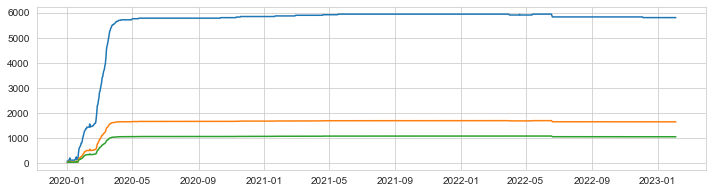

In [10]:
# Total por días
temp = data.groupby('date').sum()

# Grafica
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(temp.index, temp['median_age'], label='Edad media de la población')
ax.plot(temp.index, temp['aged_65_older'], label='Población mayor de 65 años', color='C1')
ax.plot(temp.index, temp['aged_70_older'], label='Población mayor de 70 años', color='C2')
plt.show()

### Verificación de datos nulos
Para el correcto tratamiento de los datos se verificarán los casos en los que sucedieron, ya que pueden existir casos que son anormales pero existentes, por ejemplo, 0 total de vacunaciones.

En este caso creo que es posible que los valores sean nulos, ya que el dataset está formado por registros diarios y en esos casos puede haberse no llevado a cabo la vacunación o dejarse vacio. Pero como los datos nulos o NaN no nos sirven para el modelo, los vamos a eliminar.

In [11]:
# Eliminar valores NaN de people_vaccinated
data = data[data['people_vaccinated'].notna()]
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
364,AFG,Asia,Afghanistan,2021-02-22,55617.0,13.0,14.714,2433.0,1.0,0.857,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
370,AFG,Asia,Afghanistan,2021-02-28,55714.0,7.0,15.714,2443.0,0.0,1.571,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
386,AFG,Asia,Afghanistan,2021-03-16,55995.0,10.0,17.000,2460.0,1.0,1.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
408,AFG,Asia,Afghanistan,2021-04-07,56873.0,94.0,59.857,2512.0,0.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
423,AFG,Asia,Afghanistan,2021-04-22,58312.0,98.0,111.143,2561.0,4.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [12]:
# Eliminar valores 0.0 de people_vaccinated
data = data.loc[data['people_vaccinated'] != 0.0]
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
370,AFG,Asia,Afghanistan,2021-02-28,55714.0,7.0,15.714,2443.0,0.0,1.571,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
386,AFG,Asia,Afghanistan,2021-03-16,55995.0,10.0,17.000,2460.0,1.0,1.286,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
408,AFG,Asia,Afghanistan,2021-04-07,56873.0,94.0,59.857,2512.0,0.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
423,AFG,Asia,Afghanistan,2021-04-22,58312.0,98.0,111.143,2561.0,4.0,4.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
442,AFG,Asia,Afghanistan,2021-05-11,62403.0,340.0,262.857,2710.0,12.0,8.857,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


La organización Our World In Data agregó información al dataset existente diferenciando las regiones con el prefijo 'OWID_'. Y en los casos donde no contaban con información suficiente, lo agregaron por otra característica como por ejemplo: High Income, International, World, etc.

Para nuestro análisis, esta información no es relevante, por lo que vamos a eliminarla.

In [13]:
# Lista de iso_code a eliminar
owid_iso = data[data.iso_code.str.contains('OWID_')].iso_code.unique()

# Lista de indice con iso_code en lista a eliminar
drop_index = data.loc[data['iso_code'].isin(owid_iso)].index
data = data.drop(index=drop_index)

### Qué paises son más considerados en el análisis?

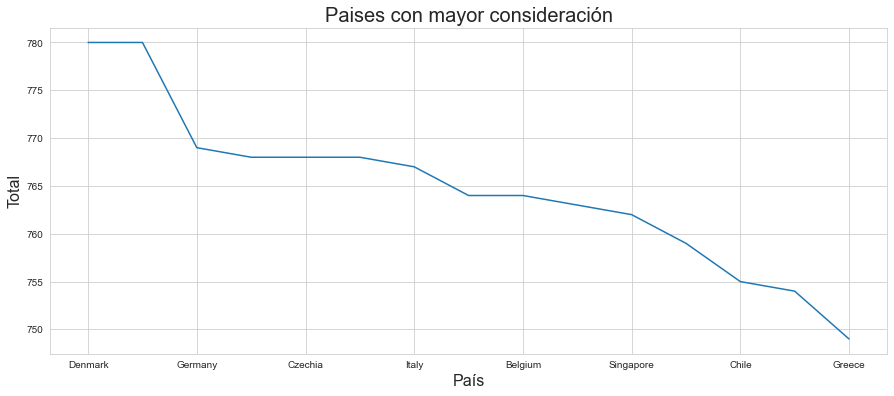

In [14]:
# Total por país
temp = data['location'].value_counts().head(15)

# Grafica
temp.plot.line(figsize=(15, 6))
plt.title('Paises con mayor consideración', fontsize=20)
plt.xlabel('País', fontsize=16)
plt.ylabel('Total', fontsize=16)
plt.show()

- Se muestra los paises con mayor consideración en el dataset
- El comporamiento de los datos es diferente para cada país
- Hay que tener en cuenta la cantidad de personas de cada país para comparar con los datos.

### En qué periodos hay mayor cantidad de datos?

In [15]:
# Agrupar por año
anio = data.groupby(data['date'].dt.to_period('Y')).size()
# Agrupar por mes
mes = data.groupby(data['date'].dt.to_period('M')).size()

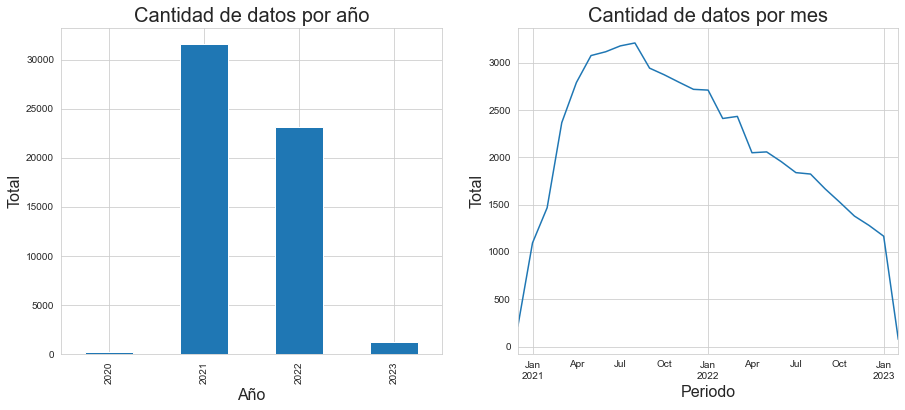

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(121)
anio.plot.bar()
plt.title('Cantidad de datos por año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Total', fontsize=16)

plt.subplot(122)
mes.plot.line()
plt.title('Cantidad de datos por mes', fontsize=20)
plt.xlabel('Periodo', fontsize=16)
plt.ylabel('Total', fontsize=16)
plt.show()

- Se puede ver que hay mayor densidad de datos en el año 2021 entre Abril y Agosto.

### Promedio de personas vacunadas por país (15 mayores)?

<AxesSubplot:xlabel='location'>

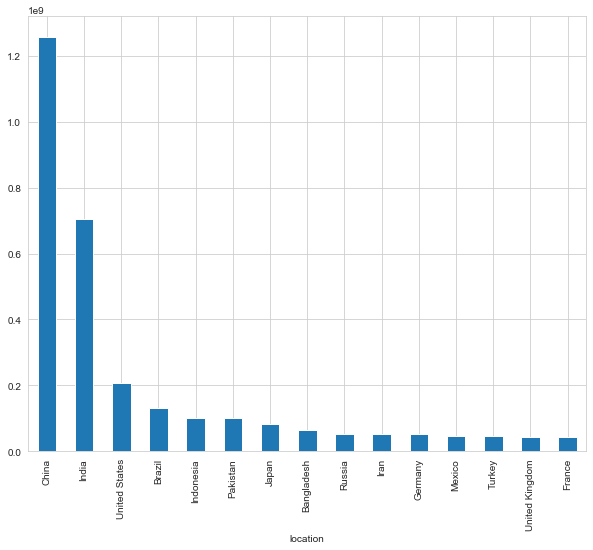

In [17]:
# Agrupar por país
temp = data.groupby('location').mean().sort_values('people_vaccinated', ascending=False)
temp['people_vaccinated'].head(15).plot.bar(figsize=(10, 8))

## 6.- Data Engineering (Obtención de insights)
Podemos ver que en China, India y Estados Unidos se vacunaron la mayor cantidad de personas entre Abril y Agosto de 2021.

## 7.- y 8.- Selección y Desarrollo del algoritmo-método
Para este dataset se decidió utilizar el modelo de forecasting que consiste en predecir el valor futuro de una serie temporal, bien modelando la serie únicamente en función de su comportamiento pasado (autorregresivo) o empleando otras variables externas.

In [18]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

In [19]:
# Agrupar por día
period = data.groupby(data['date'].dt.to_period('D')).sum()
period.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-12-04,19993.0,686.0,597.857,242.0,7.0,7.429,10803.208,370.680,323.052,130.765,...,51.0,0.0,5.57,75.29,0.866,1850654.0,0.0,0.0,0.0,0.0
2020-12-07,21520.0,207.0,635.000,272.0,10.0,9.429,11628.322,111.852,343.122,146.975,...,51.0,0.0,5.57,75.29,0.866,1850654.0,0.0,0.0,0.0,0.0
2020-12-08,133962.0,2610.0,2203.143,1262.0,9.0,11.714,23322.687,450.153,379.689,219.602,...,39.5,0.0,6.10,163.30,1.897,11316583.0,0.0,0.0,0.0,0.0
2020-12-09,62341.0,1074.0,999.286,654.0,5.0,11.286,19601.829,451.343,409.851,224.752,...,71.7,0.0,9.17,157.69,1.823,7284978.0,0.0,0.0,0.0,0.0
2020-12-10,40023.0,498.0,378.857,382.0,21.0,4.143,7364.853,91.640,69.716,70.294,...,20.7,0.0,3.60,82.40,0.957,5434324.0,0.0,0.0,0.0,0.0


In [20]:
y = pd.Series(period['people_vaccinated'].values, index=period.index)
y

date
2020-12-04    1.000000e+00
2020-12-07    2.000000e+00
2020-12-08    6.000000e+00
2020-12-09    9.000000e+00
2020-12-10    7.000000e+00
                  ...     
2023-01-31    2.220843e+09
2023-02-01    1.644274e+09
2023-02-02    3.150276e+09
2023-02-03    1.442695e+09
2023-02-04    1.303926e+09
Freq: D, Length: 791, dtype: float64

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

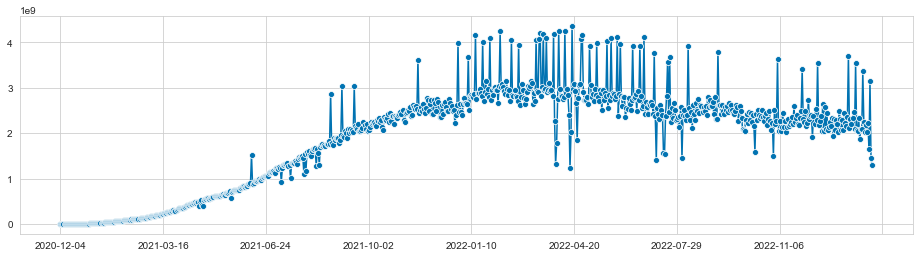

In [21]:
plot_series(y)

In [22]:
y_train, y_test = temporal_train_test_split(y)

In [23]:
# Crear modelo para pronosticar y_test desde y_train
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=72)
forecaster.fit(y_train) 

# Predicciones
y_pred = forecaster.predict(fh)

c:\Users\alk10\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0, 0.5, 'Personas vacunadas [millones]')

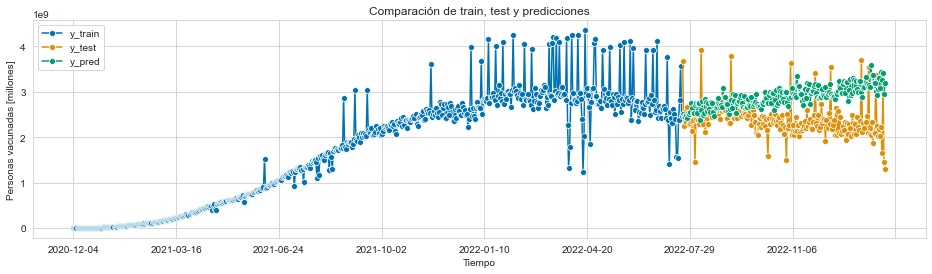

In [24]:
# Grafica de data y predicciones
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.set_title('Comparación de train, test y predicciones')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Personas vacunadas [millones]')

In [25]:
mean_absolute_percentage_error(y_test, y_pred)

0.2649766171839441

In [26]:
fh2 = ForecastingHorizon(y_train.index, is_relative=False)
y_pred2 = forecaster.predict(fh2)

mean_absolute_percentage_error(y_train, y_pred2)

6494584.025570711

Aca podemos ver que se produce un subajuste, ya que al inicio del dataset y_train no hay datos para comparar.

#### Estudiamos la diferencia

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

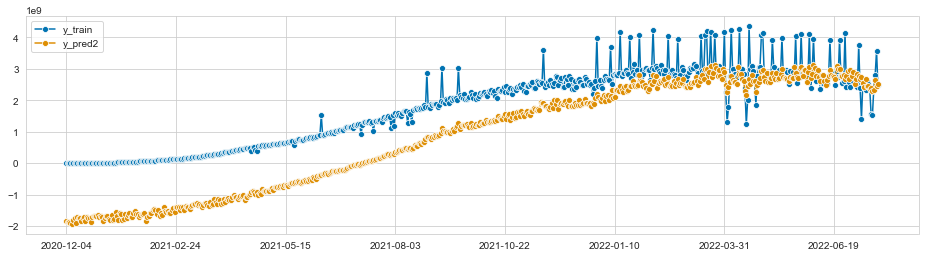

In [27]:
# Grafica de y_train y y_pred2
plot_series(y_train, y_pred2, labels=['y_train', 'y_pred2'])

In [28]:
fh2 = ForecastingHorizon(y_train.loc['2021-10-01':].index, is_relative=False)
y_pred2 = forecaster.predict(fh2)

In [29]:
mean_absolute_percentage_error(y_train.loc['2021-10-01':], y_pred2)

0.20194423817791463

In [30]:
mean_absolute_percentage_error(y_test, y_pred)

0.2649766171839441

Al omitir los primeros datos del dataset train, el MEA es más parecido al de test, ya que al inicio de y_train el margen de error es muy grande, porque no tiene datos previos para contrastar.